In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv',encoding='Latin-1')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Outlier Detections

## 1. Z score

In [3]:
from scipy.stats import zscore

In [4]:
z_df=zscore(df['wheelbase'])


In [5]:
var=np.where(np.abs(z_df)>2.5)
li=list(var[0])
li

[70, 71, 73, 109, 110, 113, 114]

In [6]:
for i in li:
    df['wheelbase'].iloc[i]=df['wheelbase'].mean()
    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18788\2584454806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wheelbase'].iloc[i]=df['wheelbase'].mean()


In [7]:
var=np.where(np.abs(z_df)>2.5)
li=list(var[0])
li

[70, 71, 73, 109, 110, 113, 114]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='wheelbase', ylabel='wheelbase'>

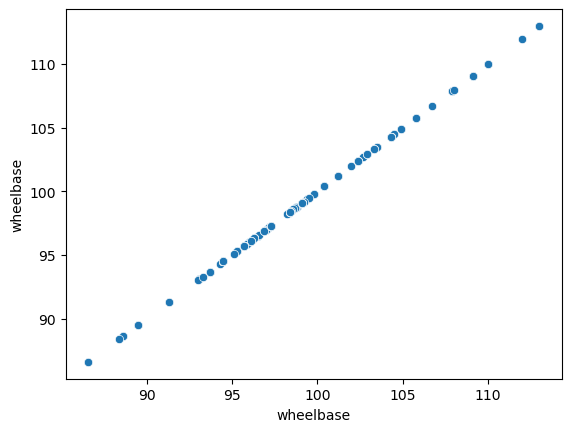

In [9]:
sns.scatterplot(x=df['wheelbase'],y=df['wheelbase'])

In [10]:
df['wheelbase'].sort_values(ascending=False).head(30)

47     113.0
48     113.0
74     112.0
17     110.0
67     110.0
68     110.0
204    109.1
203    109.1
202    109.1
201    109.1
200    109.1
117    108.0
107    107.9
108    107.9
111    107.9
112    107.9
115    107.9
116    107.9
69     106.7
8      105.8
7      105.8
6      105.8
65     104.9
66     104.9
180    104.5
181    104.5
194    104.3
199    104.3
198    104.3
197    104.3
Name: wheelbase, dtype: float64

## 2 Box Plot

<Axes: >

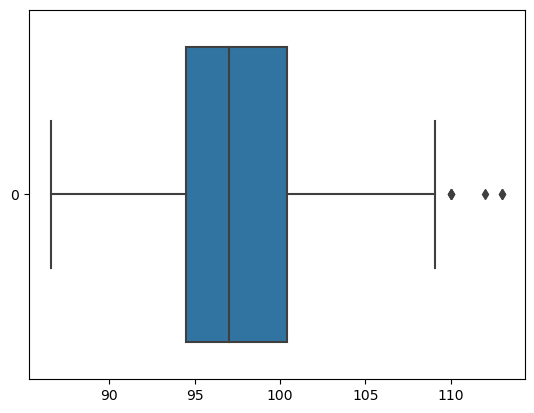

In [11]:
sns.boxplot(df['wheelbase'],orient="h")

## 3. IQR

In [12]:
q1=df['wheelbase'].quantile(.25)
q1

94.5

In [13]:
q3=df['wheelbase'].quantile(.75)
q3

100.4

In [14]:
#  Formula IQR=q3-q1
IQR=q3-q1
IQR

5.900000000000006

In [15]:
Lower_tail= q1-(1.5*IQR)
Lower_tail

85.64999999999999

In [16]:
Upper_tail= q3 + (1.5*IQR)
Upper_tail

109.25000000000001

In [17]:
df['wheelbase'].describe()

count    205.000000
mean      98.174115
std        5.105165
min       86.600000
25%       94.500000
50%       97.000000
75%      100.400000
max      113.000000
Name: wheelbase, dtype: float64

In [18]:
df['wheelbase'].loc[df['wheelbase']>Upper_tail]

17    110.0
47    113.0
48    113.0
67    110.0
68    110.0
74    112.0
Name: wheelbase, dtype: float64

In [19]:
df['wheelbase'].loc[df['wheelbase']>Upper_tail]=df['wheelbase'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18788\1385674368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wheelbase'].loc[df['wheelbase']>Upper_tail]=df['wheelbase'].mean()


In [20]:
df['wheelbase'].loc[df['wheelbase']>Upper_tail]

Series([], Name: wheelbase, dtype: float64)

In [21]:
df['wheelbase'].loc[df['wheelbase']<Lower_tail]

Series([], Name: wheelbase, dtype: float64)

<Axes: >

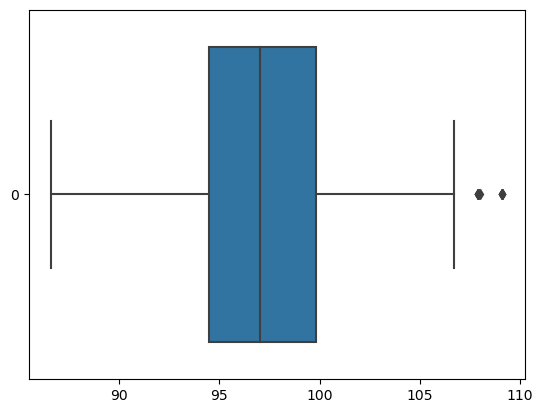

In [22]:
sns.boxplot(df['wheelbase'],orient="h")

### second iteration 

In [23]:
df['wheelbase'].describe()

count    205.000000
mean      97.788967
std        4.556863
min       86.600000
25%       94.500000
50%       97.000000
75%       99.800000
max      109.100000
Name: wheelbase, dtype: float64

In [24]:
q1=df['wheelbase'].quantile(.25)
q3=df['wheelbase'].quantile(.75)
IQR=q3-q1
Lower_tail= q1-(1.5*IQR)
print(f'{Lower_tail=}')
Upper_tail= q3 + (1.5*IQR)
print(f'{Upper_tail=}')

Lower_tail=86.55000000000001
Upper_tail=107.75


In [25]:
df['wheelbase'].loc[df['wheelbase']>Upper_tail]

107    107.9
108    107.9
111    107.9
112    107.9
115    107.9
116    107.9
117    108.0
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheelbase, dtype: float64

In [26]:
df['wheelbase'].loc[df['wheelbase']>Upper_tail]=df['wheelbase'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18788\1385674368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wheelbase'].loc[df['wheelbase']>Upper_tail]=df['wheelbase'].mean()


<Axes: >

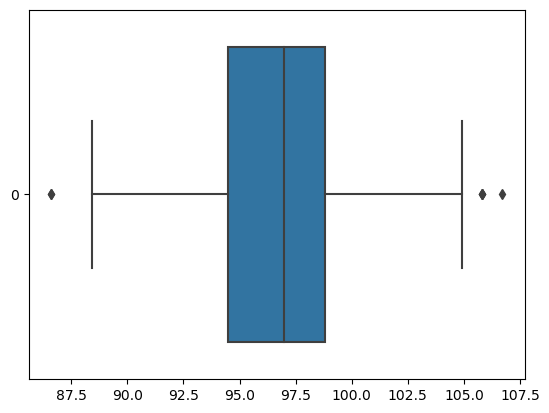

In [27]:
sns.boxplot(df['wheelbase'],orient="h")

### third iteration 

In [28]:
df['wheelbase'].describe()

count    205.000000
mean      97.167345
std        3.704452
min       86.600000
25%       94.500000
50%       97.000000
75%       98.800000
max      106.700000
Name: wheelbase, dtype: float64

Lower_tail=88.05000000000001
Upper_tail=105.25


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18788\3762520033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wheelbase'].loc[df['wheelbase']>Upper_tail]=df['wheelbase'].mean()


<Axes: >

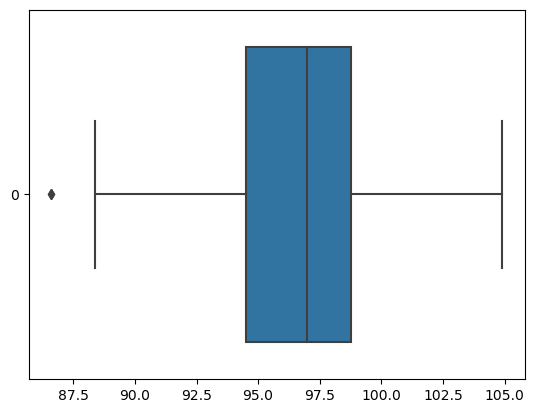

In [29]:
df['wheelbase'].describe()

q1=df['wheelbase'].quantile(.25)
q3=df['wheelbase'].quantile(.75)
IQR=q3-q1
Lower_tail= q1-(1.5*IQR)
print(f'{Lower_tail=}')
Upper_tail= q3 + (1.5*IQR)
print(f'{Upper_tail=}')

df['wheelbase'].loc[df['wheelbase']>Upper_tail]

df['wheelbase'].loc[df['wheelbase']>Upper_tail]=df['wheelbase'].mean()

sns.boxplot(df['wheelbase'],orient="h")

### 4th iteration 

In [30]:
df['wheelbase'].describe()

count    205.000000
mean      96.994513
std        3.485911
min       86.600000
25%       94.500000
50%       97.000000
75%       98.756585
max      104.900000
Name: wheelbase, dtype: float64

Lower_tail=88.11512195121949
Upper_tail=105.14146341463416


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18788\2376265056.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wheelbase'].loc[df['wheelbase']<Lower_tail]=df['wheelbase'].mean()


<Axes: >

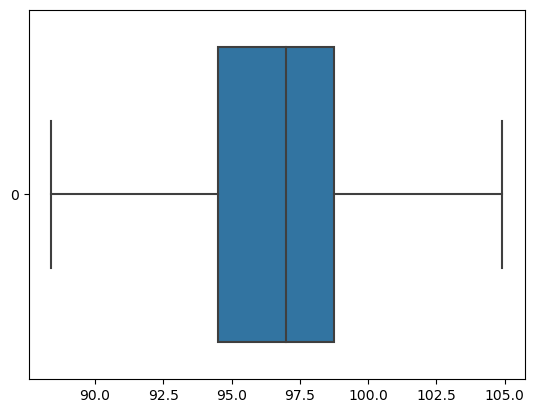

In [31]:
df['wheelbase'].describe()

q1=df['wheelbase'].quantile(.25)
q3=df['wheelbase'].quantile(.75)
IQR=q3-q1
Lower_tail= q1-(1.5*IQR)
print(f'{Lower_tail=}')
Upper_tail= q3 + (1.5*IQR)
print(f'{Upper_tail=}')

df['wheelbase'].loc[df['wheelbase']>Upper_tail]

df['wheelbase'].loc[df['wheelbase']<Lower_tail]=df['wheelbase'].mean()

sns.boxplot(df['wheelbase'],orient="h")

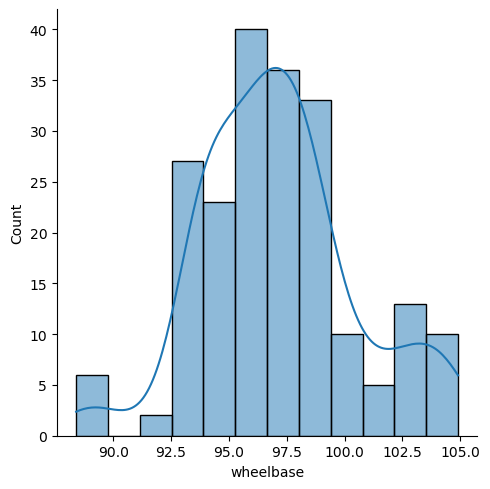

In [32]:
sns.displot(df['wheelbase'], kde=True)